<a href="https://colab.research.google.com/github/nicolemd7/Rumour-Detection/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installation

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
# vectorize the data
import spacy
nlp = spacy.load("en_core_web_sm")
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop =stopwords.words('english')
from wordcloud   import WordCloud, STOPWORDS
import string
import regex as re
string.punctuation
from sklearn import preprocessing
import pickle
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data Loading

The dataset that was extracted was then manually labelled

In [ ]:
dataframe =pd.read_csv("/content/drive/MyDrive/Rumour/dataset.csv")


In [ ]:
train=dataframe.sample(frac=0.8,random_state=200) #random state is a seed value
test=dataframe.drop(train.index)

#Dataset Loading

The **.head()** function prints the first 5 rows of the dataframe

In [ ]:
train.head()

,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


#Exploratory Data Analysis

The **.shape** function gives the total number of rows and columns in the dataset

In [ ]:
train.shape

(82573, 4)

In [ ]:
test.shape

(20643, 4)

The **.head()** function prints the first 5 rows of the dataframe

In [ ]:
train.head()

,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


The **.info()** function gives information about the datatype, number of non null rows and names of columns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82573 entries, 49295 to 33705
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         11954 non-null  object 
 1   is_rumor     11954 non-null  float64
 2   user.handle  11954 non-null  object 
 3   topic        11954 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20643 entries, 3 to 103212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         3040 non-null   object 
 1   is_rumor     3040 non-null   float64
 2   user.handle  3040 non-null   object 
 3   topic        3040 non-null   object 
dtypes: float64(1), object(3)
memory usage: 806.4+ KB


The **.describe()** function gives the total count of an element in the dataset, the mean number of likes and replies, the min and max values etc

In [ ]:
train.describe()

,is_rumor
count,11954.000000
mean,0.500000
std,0.500021
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
test.describe()

,is_rumor
count,3040.000000
mean,0.500000
std,0.500082
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
train.isna().sum()

text           70619
is_rumor       70619
user.handle    70619
topic          70619
dtype: int64

In [ ]:
train= train.drop("topic",axis="columns")

In [ ]:
train= train.dropna()

In [ ]:
test.isna().sum()

text           17603
is_rumor       17603
user.handle    17603
topic          17603
dtype: int64

In [ ]:
test= test.drop("topic",axis="columns")

In [ ]:
test= test.dropna()

#Data Cleaning

Adding Hashtags in a New Column


> Hashtags can be used to cluster data, it can also be used to gather more data on the company.To access the hashtags mentioned in these comments we append all strings starting with **#** into the column,to do this we use regex



In [ ]:
train["Hashtags"]= train["text"].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
test["Hashtags"]= test["text"].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
train.head()

,text,is_rumor,user.handle,Hashtags
4266,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,0.0,Progress4Ohio,"[WE, TARGETS, Cleveland, 13RacistCops, MURDERE..."
6831,@mashable @republikein_na,0.0,GaroesMonica,[]
7573,“@airlivenet: #A320 crashed could be Germanwin...,1.0,Rangith,"[A320, 4U9525]"
11156,"“@CP24: UPDATED: Shots fired -Parliament Hill,...",1.0,Bowman3Bowman,[]
11392,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,1.0,rcallimachi,[]



We now remove the urls and punctuation from the comments


> **URL** : For url we make get rid of all strings that start with http,https or www.


> **Punctuation** : We make use of the string package and access all possible punctuations,using the function we have defined we remove all punctuations and append the text and add it into the datafram





In [ ]:
train["URL removed"] =train["text"].apply(lambda x: re.split('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', str(x))[0])

In [ ]:
test["URL removed"] =test["text"].apply(lambda x: re.split('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', str(x))[0])



> **Remove HTML Tags** Since the data is extracted in HTML format,it may contain data enclosed in HTML tags, space brackets etc, we get rid of these tags



In [ ]:
def tag_remove(text):
  return re.sub('<[^<]+?>','', text)


In [ ]:
train["Tags Removed"] = train["URL removed"].apply(lambda x:tag_remove(x))

In [ ]:
test["Tags Removed"] = test["URL removed"].apply(lambda x:tag_remove(x))

The function remove punctuation takes in comment as a parameter and for each comment removes the punctuation and appends the regular words to a string, this string along with all other comment strings are returned as a list and then declared as a new column

In [ ]:

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
train["Punctuation removed"] =train["Tags Removed"].apply(lambda x:remove_punctuation(x))


test["Punctuation removed"] =test["Tags Removed"].apply(lambda x:remove_punctuation(x))


> **Removing Numbers** : Using the .isdigit() function we identify which of the words in the text contain numeric values, we skip the numeric values and concatenate the rest of text




In [ ]:
def remove_num(text):
  return ''.join(c for c in text if not c.isdigit())

In [ ]:
train["Numbers removed"] =train["Punctuation removed"].apply(lambda x:remove_num(x))


In [ ]:
test["Numbers removed"] =test["Punctuation removed"].apply(lambda x:remove_num(x))


Converting Text to Lowercase form

> We convert the text to lowercase using the **.lower()** function,we iterate it through every word in the text




In [ ]:
def to_lower(text):
    return ''.join([w.lower() for w in text])

In [ ]:
train["Lowercase"] =train["Numbers removed"].apply(lambda x:to_lower(x))


In [ ]:
test["Lowercase"] =test["Numbers removed"].apply(lambda x:to_lower(x))


#Data Visualization

Inorder to visualize the distribution of the four categories of comments  we will use countplot, the countplot will also help us understand if there's any imbalance in the data

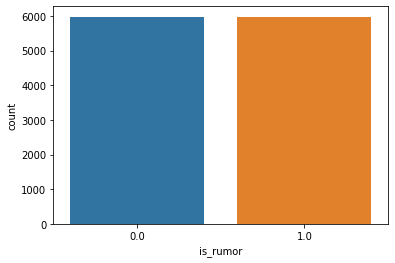

In [ ]:
sns.countplot(data=train, x = train["is_rumor"])

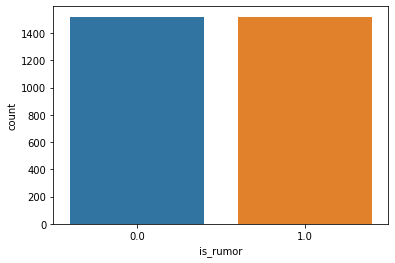

In [ ]:
sns.countplot(data=test, x = test["is_rumor"])

As we can see most of the  messages are feedback followed by appreciation and spam, there are very few queries posted

In [ ]:
train["is_rumor"].unique()

array([0., 1.])

In [ ]:
test["is_rumor"].unique()

array([1., 0.])



> **Word Cloud** : Used to identify the most commonly used words in comments



Using the wordcloud function for each comment in the lowercase column we define the 


1.   maximum no of words
2.   color scheme : which in this case is Purple and Blue
3.  background color : which in this is black

we also specify the plot size using matplotlib and give the plot a title



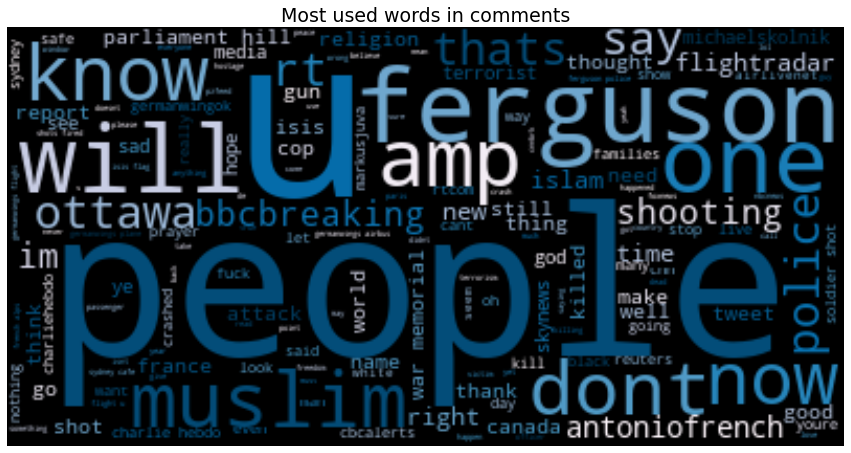

In [ ]:
text = ",".join(review for review in train.Lowercase)
wordcloud = WordCloud(max_words=200, colormap='PuBu',background_color="black").generate(text) #defines the color scheme,max number of words in a word cloud
plt.figure(figsize=(15,10)) # specifies plot size
plt.imshow(wordcloud, interpolation='bilinear') # interpolation is essentially a sampling method, bilinear interpolation means using distance weighted avg of four pixels to estimate the new one
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Most used words in comments',fontsize=19)
plt.show()

In [ ]:
def wordcount_gen(data, is_rumor):
    combined_tweets = " ".join([tweet for tweet in data[data.is_rumor==is_rumor]['Lowercase']])
     
    wc = WordCloud(background_color='black',max_words=50,stopwords = STOPWORDS)
    plt.figure(figsize=(15,15))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(is_rumor), fontsize=20)
    plt.axis('off')
    plt.show()

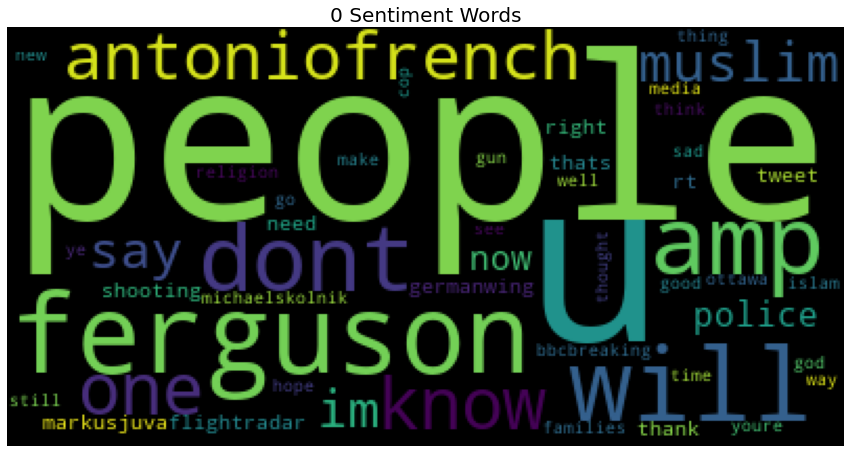

In [ ]:
wordcount_gen(train,0)

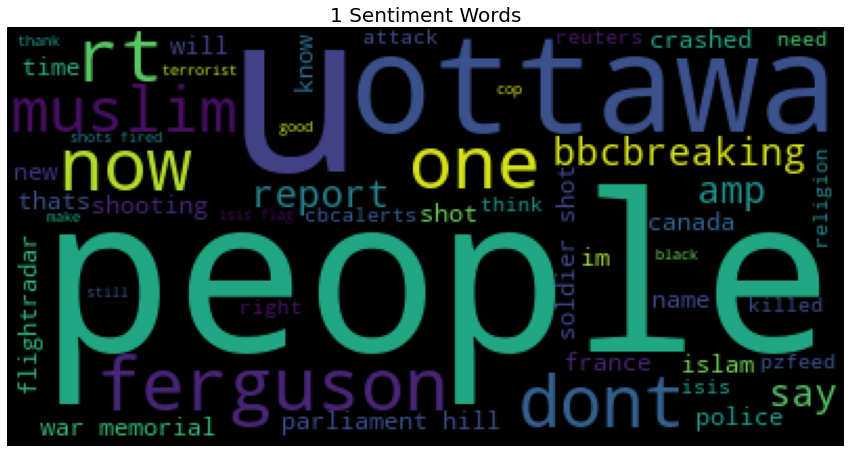

In [ ]:
wordcount_gen(train,1)



> **Distribution of number of words in text** 
Using the KDE plot function of the seaborn package we plot a normal distribution of the number of words used in each text,from the below plot we can infer that most comments contain between 0 to 200 words




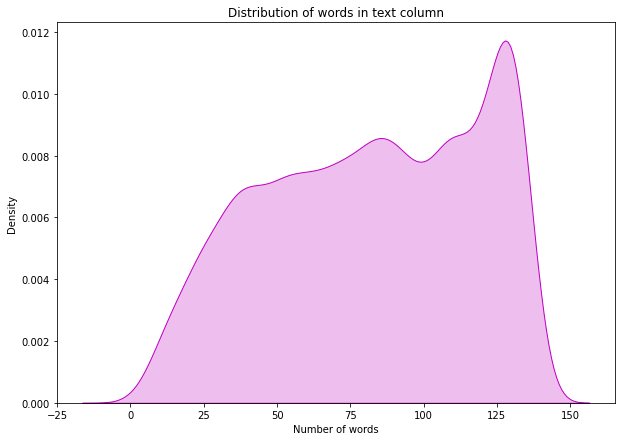

In [ ]:
train["num of words"] = train["Lowercase"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(train["num of words"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

Likes Vs Number of Words In a Comment

#Data Preprocessing

In [ ]:
train.head()

,text,is_rumor,user.handle,Hashtags,URL removed,Tags Removed,Punctuation removed,Numbers removed,Lowercase,num of words
4266,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,0.0,Progress4Ohio,"[WE, TARGETS, Cleveland, 13RacistCops, MURDERE...",@kayoazul @_westwest_yall #WE Are #TARGETS I H...,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,kayoazul westwestyall WE Are TARGETS I Have Ve...,kayoazul westwestyall WE Are TARGETS I Have Ve...,kayoazul westwestyall we are targets i have ve...,111
6831,@mashable @republikein_na,0.0,GaroesMonica,[],@mashable @republikein_na,@mashable @republikein_na,mashable republikeinna,mashable republikeinna,mashable republikeinna,22
7573,“@airlivenet: #A320 crashed could be Germanwin...,1.0,Rangith,"[A320, 4U9525]",“@airlivenet: #A320 crashed could be Germanwin...,“@airlivenet: #A320 crashed could be Germanwin...,“airlivenet A320 crashed could be Germanwings ...,“airlivenet A crashed could be Germanwings fli...,“airlivenet a crashed could be germanwings fli...,81
11156,"“@CP24: UPDATED: Shots fired -Parliament Hill,...",1.0,Bowman3Bowman,[],"“@CP24: UPDATED: Shots fired -Parliament Hill,...","“@CP24: UPDATED: Shots fired -Parliament Hill,...",“CP24 UPDATED Shots fired Parliament Hill sold...,“CP UPDATED Shots fired Parliament Hill soldie...,“cp updated shots fired parliament hill soldie...,81
11392,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,1.0,rcallimachi,[],@Ahmed__Hussain_ @ummsalama15_ Some media owne...,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,AhmedHussain ummsalama15 Some media owned by J...,AhmedHussain ummsalama Some media owned by Jew...,ahmedhussain ummsalama some media owned by jew...,118


#Data Preprocessing

Stop Word Removal

Stop Words in NLP are simply words that do not contribute to the sentiment analysis of text e.g words like the,a etc


> To eliminate stopwords from the below text we make use of the NLTK stopword list, and we make use of a count vectorizer and TFiDF vectorizer to count the number of occurences of a word and evaluate whether it's a stopword or not



In [ ]:


#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(train['Lowercase'].values.astype('U'))

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"])


#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names()

first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

df_tfifd.sort_values(by=["tfidf"],ascending=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
aaenmss,0.000000
precise,0.000000
precisely,0.000000
precision,0.000000
predicament,0.000000
...,...
gaze,0.000000
gathered,0.000000
허걱스,0.000000
mashable,0.568497


In [ ]:
train['Stopwords_Removed'] = train['Lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
test['Stopwords_Removed'] = test['Lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Train - Test Split

In [ ]:
X_train = train["Stopwords_Removed"]
y_train = train["is_rumor"]

In [ ]:
X_test2 = test["Stopwords_Removed"]
y_test2 = test["is_rumor"]

In [ ]:
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-09-22 04:36:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-09-22 04:36:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-22 04:36:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

**GloVe Vectorization**


> GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j.



In [ ]:

!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
def model_input(X_train, X_test,MAX_NB_WORDS=65000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    print(text.shape)

    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)

    X_train_Glove = text[0:len(X_train), ]
    X_test_Glove = text[len(X_train):, ]

    embeddings_dict = {}
    f = open("glove.6B.100d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_dict[word] = coefs
    f.close()

    print('Total %s word vectors.' % len(embeddings_dict))
    return (X_train_Glove, X_test_Glove, word_index, embeddings_dict)

LSTM


> Long-Short Term Memory is a type of recurrent neural network. It is utilised for analysing, forecasting, and classifying time-series data. It dealt with the problem of RNN's long-term dependence, which means that the RNN can't predict words that are in its long-term memory, but it can make more accurate predictions based on the data it has right now. RNN's performance gets worse as the gap length gets longer. By default, LSTM is capable of storing information for a long time.



In [ ]:
def build_lstm(word_index, embeddings_dict, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    # Initializing a sequential model
    model = Sequential()
    # Using embedding_dict to make the embedding matrix
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("EMBEDDING_DIM is not equal to embedding_vector file GloVe")
                exit(1)
            embedding_matrix[i] = embedding_vector
            
    #embedding layer
    model.add(Embedding(len(word_index) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(nclasses, activation='softmax')) #Softmax activation since multi-class classification
    opt=Adam(learning_rate=5e-5)
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
X_train_Glove, X_test_Glove, word_index, embeddings_dict = model_input(X_train,X_test2)
model = build_lstm(word_index, embeddings_dict, 4)
model.summary()

(14994,)
Found 19270 unique tokens.
(14994, 500)
Total 400000 word vectors.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1927100   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)    

In [ ]:
history1 = model.fit(X_train_Glove, y_train,epochs=10,validation_data=(X_test_Glove,y_test2),batch_size=128,verbose=1)


Epoch 1/10
94/94 [==============================] - 241s 3s/step - loss: 0.2089 - accuracy: 0.9120 - val_loss: 0.3109 - val_accuracy: 0.8743
Epoch 2/10
94/94 [==============================] - 223s 2s/step - loss: 0.1770 - accuracy: 0.9311 - val_loss: 0.2880 - val_accuracy: 0.8895
Epoch 3/10
94/94 [==============================] - 222s 2s/step - loss: 0.1469 - accuracy: 0.9422 - val_loss: 0.3346 - val_accuracy: 0.8757
Epoch 4/10
94/94 [==============================] - 225s 2s/step - loss: 0.1232 - accuracy: 0.9521 - val_loss: 0.2938 - val_accuracy: 0.8951
Epoch 5/10
94/94 [==============================] - 223s 2s/step - loss: 0.1087 - accuracy: 0.9569 - val_loss: 0.2780 - val_accuracy: 0.8987
Epoch 6/10
94/94 [==============================] - 221s 2s/step - loss: 0.0954 - accuracy: 0.9622 - val_loss: 0.3348 - val_accuracy: 0.8891
Epoch 7/10
94/94 [==============================] - 220s 2s/step - loss: 0.0863 - accuracy: 0.9654 - val_loss: 0.3189 - val_accuracy: 0.8954
Epoch 8/10
94

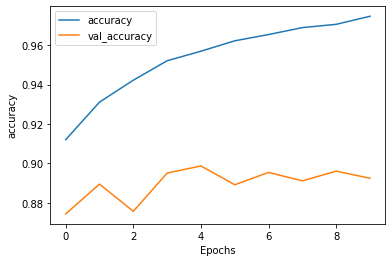

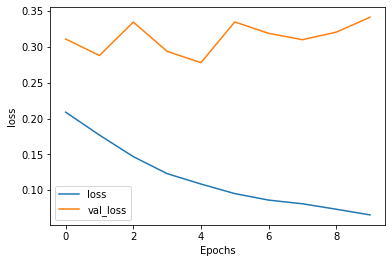

In [ ]:
plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

In [ ]:
print("\n Evaluating Model \n")
predict_x=model.predict(X_test_Glove) 
classes_x=np.argmax(predict_x,axis=1)
print(metrics.classification_report(y_test2,classes_x))


 Evaluating Model 

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.89      1520
         1.0       0.91      0.87      0.89      1520

    accuracy                           0.89      3040
   macro avg       0.89      0.89      0.89      3040
weighted avg       0.89      0.89      0.89      3040

